In [29]:
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
import scipy as sp

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

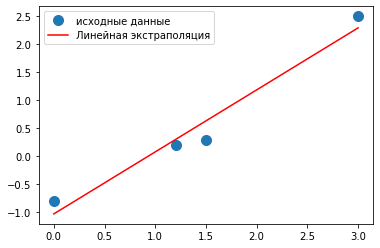

In [58]:
#Task 1

x = np.array([0, 1.2, 1.5, 3])
y = np.array([-0.8, 0.2, 0.3, 2.5])
m, c = np.linalg.lstsq(np.vstack([x, np.ones(len(x))]).T, y, rcond= None)[0]
plt.plot(x, y, 'o', label='исходные данные', markersize=10)
plt.plot(x, m*x + c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()

In [45]:
delta = 1.0
x = np.linspace(-100, 100, 11)
y = x**2 + delta * (rand(11) - 0.5)
x += delta *  (rand(11) - 0.5)

x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

In [46]:
x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')
print(x)
print(y)

[-100.04815856  -79.68568533  -59.70016759  -39.80339684  -20.05874746
   -0.16027368   19.85603434   40.09823517   59.90894222   79.59314758
  100.38671849]
[9.99988896e+03 6.40044257e+03 3.59966528e+03 1.60045681e+03
 3.99926279e+02 1.29043537e-01 4.00260513e+02 1.59958098e+03
 3.59952341e+03 6.40036178e+03 9.99993986e+03]


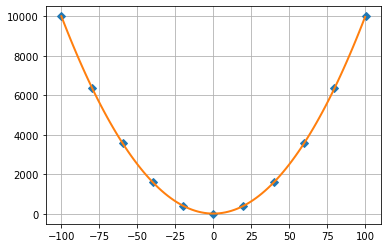

In [50]:
m = vstack((x**2, x, ones(11))).T

s = np.linalg.lstsq(m, y, rcond= None)[0]

x_prec = linspace(-100, 100, 101)

plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2],
        '-', lw= 2)
plt.grid()
plt.savefig('парабола.png')



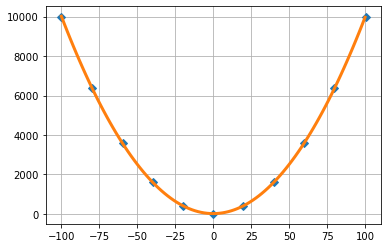

In [48]:
m = vstack((x**3, x**2, x, ones(11))).T

s = np.linalg.lstsq(m, y, rcond= None)[0]

x_prec = linspace(-100, 100, 101)

plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec + s[3],
        '-', lw= 3)
plt.grid()
plt.savefig('полином_3_степени.png')


beta_opt:  [0.29480702 0.70072678]
lin_dev:  4.3417725323512306e-05
fres:  0.15109368124635236


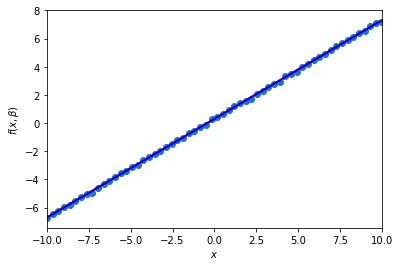

In [105]:
#Task 2
#№ 1
beta = (0.3, 0.7)
def f1(x, b0, b1):
    return b0 + b1 * x

xdata = np.linspace(-10, 10, 60)
y = f1(xdata, *beta)
ydata = y+0.05*np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f1, xdata, ydata)
print('beta_opt: ', beta_opt)

lin_dev = sum(beta_cov[0])
print('lin_dev: ', lin_dev)

residuals = ydata - f1(xdata, *beta_opt)
fres = sum(residuals**2)
print('fres: ', fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f1(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(-10, 10)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f(x, \beta)$")
plt.show()


beta_opt:  [0.29112514 0.70135628 0.50002054]
lin_dev:  8.230278046045775e-05
fres:  0.12709179384840225


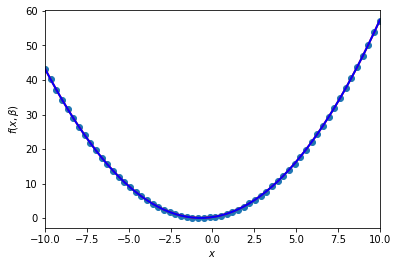

In [99]:
#№ 2
beta = (0.3, 0.7, 0.5)
def f2(x, b0, b1, b2):
    return b0 + b1 * x + b2*x*x

xdata = np.linspace(-10, 10, 60)
y = f2(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f2, xdata, ydata)
print('beta_opt: ', beta_opt)

lin_dev = sum(beta_cov[0])
print('lin_dev: ', lin_dev)

residuals = ydata - f2(xdata, *beta_opt)
fres = sum(residuals**2)
print('fres: ', fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f2(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(-10, 10)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f(x, \beta)$")
plt.show()


beta_opt:  [1.02809023 2.99316405]
lin_dev:  0.00010083104430578288
fres:  0.10496956604014203


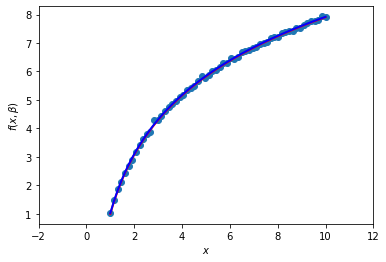

In [96]:
#№ 3
beta = (1, 3)
def f3(x, b0, b1):
    return b0 + b1 * np.log(x)

xdata = np.linspace(1, 10, 60)
y = f3(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f3, xdata, ydata)
print('beta_opt: ', beta_opt)

lin_dev = sum(beta_cov[0])
print('lin_dev: ', lin_dev)

residuals = ydata - f3(xdata, *beta_opt)
fres = sum(residuals**2)
print('fres: ', fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f3(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(-2, 12)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f(x, \beta)$")
plt.show()

#Изменение второй бетты приводит к более кучному распределнию

beta_opt:  [1.00000853 3.99999702]
lin_dev:  5.249624985287402e-10
fres:  0.11044294463372648


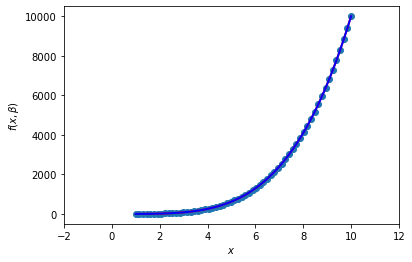

In [91]:
#№ 4
beta = (1, 4)
def f4(x, b0, b1):
    return b0 * x ** b1

xdata = np.linspace(1, 10, 60)
y = f4(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f4, xdata, ydata)
print('beta_opt: ', beta_opt)

lin_dev = sum(beta_cov[0])
print('lin_dev: ', lin_dev)

residuals = ydata - f4(xdata, *beta_opt)
fres = sum(residuals**2)
print('fres: ', fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f4(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(-2, 12)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f(x, \beta)$")
plt.show()


#Изменение второй бетты приводит к более глубогому прогибу функции

In [140]:
#Task 3
df = pd.read_csv('df_lin.csv', sep=',')


X_train, X_test, y_train, y_test = train_test_split(df['Salary'], df['YearsExperience'], test_size=0.3)

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X_train, y_train)
print(reg.intercept_)
print(reg.coef_)

y_pred = reg.predict(X_test)
df_comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_comp)

-2.150652530245119
[9.84809679e-05]
    Actual  Predicted
1      1.3   2.399661
5      2.9   3.427506
7      3.2   3.211144
20     6.8   6.883795
24     8.7   8.626218
26     9.5   9.368568
28    10.3   9.902532
13     4.1   3.470740
3      2.0   2.135732


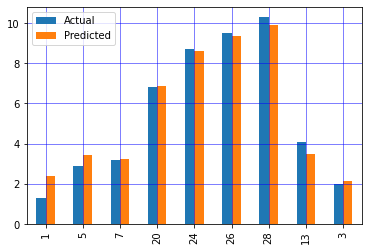

In [141]:
df_comp.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='g')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='b')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

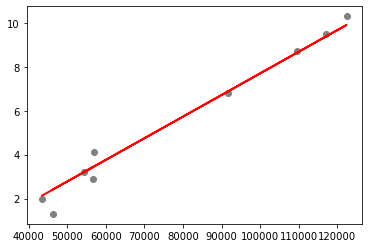

In [142]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show

In [143]:
#Task 4

df = pd.read_csv('df_lin_2.csv', sep=',')
X = df.copy()
del X['Petrol_Consumption']

X_train, X_test, y_train, y_test = train_test_split(
    X, df['Petrol_Consumption'], test_size=0.3)

reg = LinearRegression()
reg.fit(X_train, y_train)
print(reg.intercept_)
print('Коэффициенты: ', reg.coef_)

y_pred = reg.predict(X_test)
df_comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_comp

200.88815220086633
Коэффициенты:  [-2.87548086e+01 -5.56763023e-02 -2.06641280e-03  1.48060632e+03]


,Actual,Predicted
35,644,715.113306
16,603,594.755738
25,566,530.565996
7,467,499.810261
11,471,447.834547
1,524,558.591243
19,640,704.732787
27,631,609.643321
41,699,621.398633
20,649,709.336946


MSE:  3261.82238232719


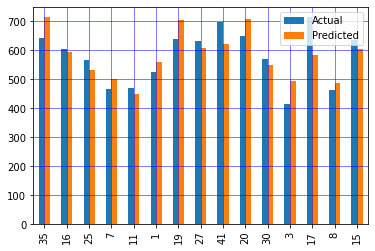

In [144]:
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))

df_comp.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='g')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='b')
plt.show()